In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv("train.csv")
df.shape

(84967, 24)

In [24]:
df.info

<bound method DataFrame.info of           ID  Gender  Age Customer Type Type of Travel         Class  \
0      37576    Male   46     Returning       Business      Business   
1      56913    Male   30     Returning       Business      Business   
2       6541  Female   50     Returning       Business      Business   
3      40646  Female   48     Returning       Business       Economy   
4      29947  Female   24     Returning       Business  Economy Plus   
...      ...     ...  ...           ...            ...           ...   
84962  53730    Male   49    First-time       Business      Business   
84963  82113    Male    7     Returning       Personal  Economy Plus   
84964  54411  Female   19     Returning       Personal       Economy   
84965  15247    Male   58     Returning       Business      Business   
84966  21254    Male   50     Returning       Business       Economy   

       Flight Distance  Departure Delay  Arrival Delay  \
0                 1608                0      

In [25]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,Male,49,First-time,Business,Business,1310,0,0.0,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,82113,Male,7,Returning,Personal,Economy Plus,650,0,0.0,3,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,54411,Female,19,Returning,Personal,Economy,363,0,0.0,5,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,15247,Male,58,Returning,Business,Business,3445,9,5.0,1,...,5,5,5,3,5,5,1,5,5,Satisfied


In [26]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             262
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

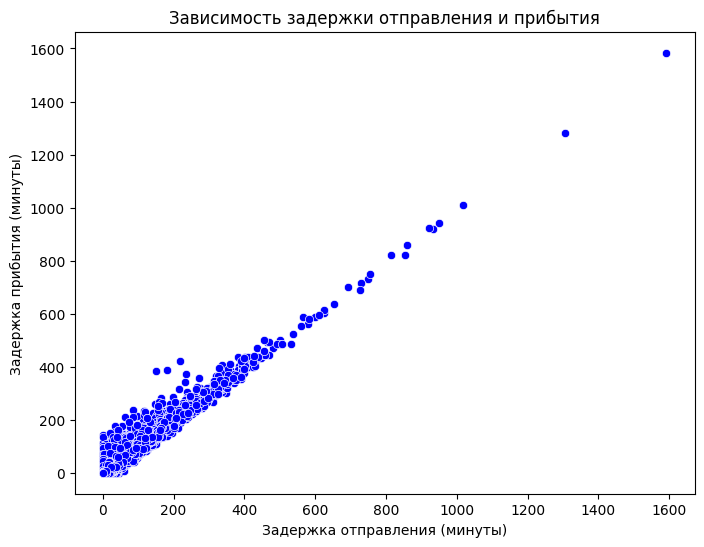

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay', y='Arrival Delay', data=df, color='blue')
plt.title('Зависимость задержки отправления и прибытия')
plt.xlabel('Задержка отправления (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.show()

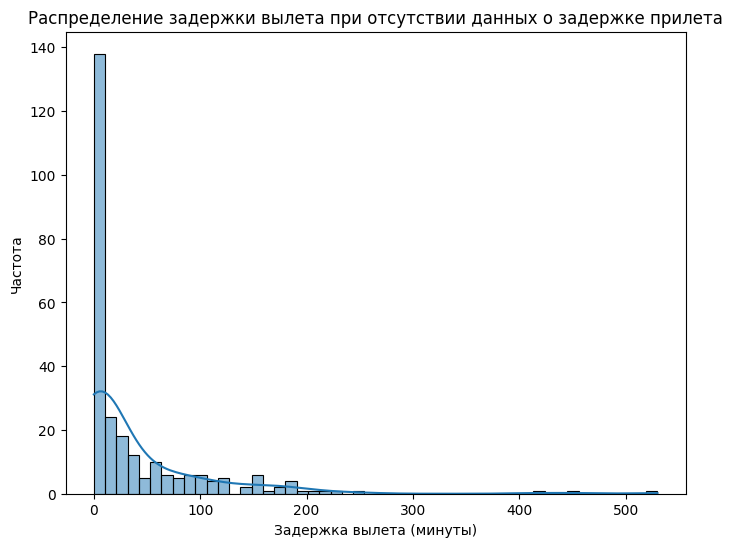

In [56]:
df_filtered = df[df['Arrival Delay'].isna()]

plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['Departure Delay'], kde=True, bins = 50)
plt.title('Распределение задержки вылета при отсутствии данных о задержке прилета')
plt.xlabel('Задержка вылета (минуты)')
plt.ylabel('Частота')
plt.show()


In [57]:
print(df_filtered["Departure Delay"].median())
df_filtered["Departure Delay"].mean()

8.0


39.095419847328245

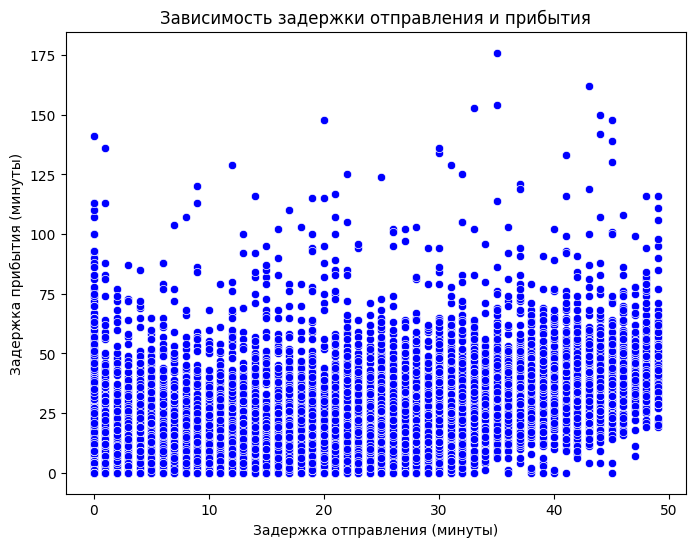

In [72]:
df_crop = df[df["Departure Delay"] < 50]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay', y='Arrival Delay', data=df_crop, color='blue')
plt.title('Зависимость задержки отправления и прибытия')
plt.xlabel('Задержка отправления (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.show()

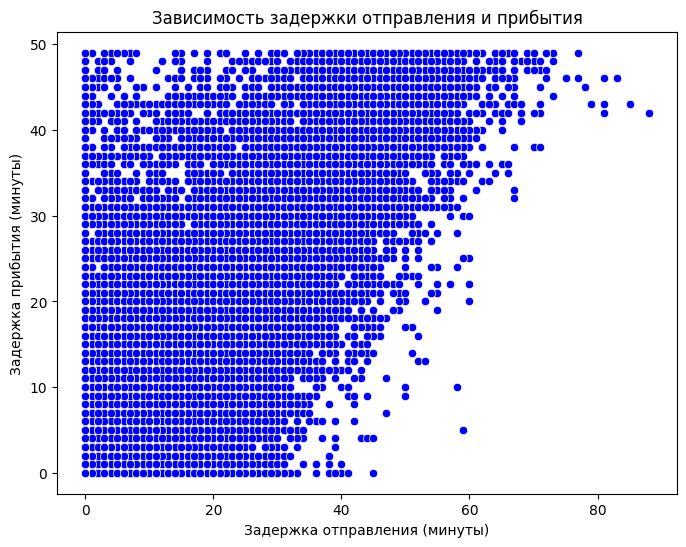

In [73]:
df_crop_ = df[(df["Departure Delay"] < 100) & (df["Arrival Delay"] < 50)]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay', y='Arrival Delay', data=df_crop_, color='blue')
plt.title('Зависимость задержки отправления и прибытия')
plt.xlabel('Задержка отправления (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.show()

In [116]:
degree = 2
df_crop = df_crop[~df_crop['Arrival Delay'].isna()]
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(df_crop['Departure Delay'].values.reshape(-1, 1), df_crop['Arrival Delay'].values)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [209]:
df_new = df.copy()
df_new.loc[df['Arrival Delay'].isna() & (df['Departure Delay'] < 100), 'Arrival Delay'] = polyreg.predict(df[df['Arrival Delay'].isna() & (df['Departure Delay'] < 100)][['Departure Delay']])
df_new.loc[df['Arrival Delay'].isna() & (df['Departure Delay'] >= 100), 'Arrival Delay'] = df_new.loc[df['Arrival Delay'].isna() & (df['Departure Delay'] >= 100), 'Departure Delay']

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


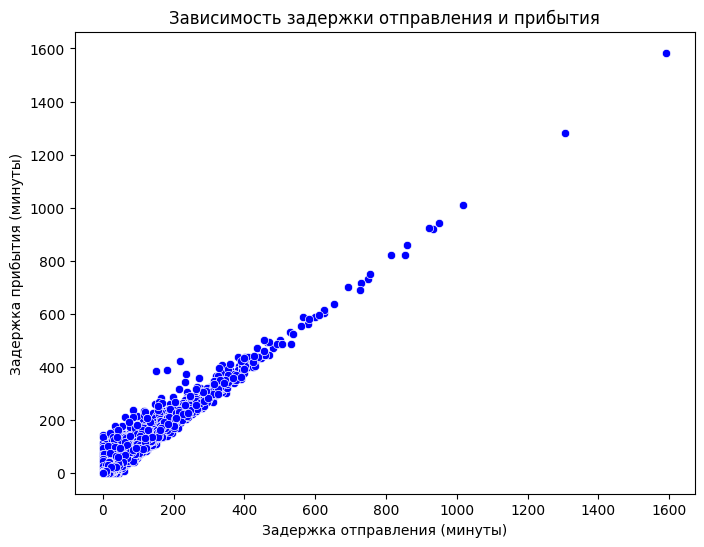

In [210]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure Delay', y='Arrival Delay', data=df_new, color='blue')
plt.title('Зависимость задержки отправления и прибытия')
plt.xlabel('Задержка отправления (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.show()

In [211]:
df_new.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [ ]:

df_new['Satisfaction'] = df_new['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0}) # Замените 'your_target_column_name'
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('Satisfaction', axis=1)  # Убираем целевую колонку из признаков
y = df_new['Satisfaction']


# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение категориальных и числовых признаков (может потребовать корректировки в зависимости от ваших данных)
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Создание трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Создание пайплайна
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
y_pred

Accuracy: 0.9967635636106861
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6576
           1       1.00      1.00      1.00     10418

    accuracy                           1.00     16994
   macro avg       1.00      1.00      1.00     16994
weighted avg       1.00      1.00      1.00     16994



array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [219]:
df_test = pd.read_csv( "test.csv" )
print(df_test.isnull().sum())

df_test.loc[df_test['Arrival Delay'].isna() & (df_test['Departure Delay'] < 100), 'Arrival Delay'] = polyreg.predict(df_test[df_test['Arrival Delay'].isna() & (df_test['Departure Delay'] < 100)][['Departure Delay']])
df_test.loc[df_test['Arrival Delay'].isna() & (df_test['Departure Delay'] >= 100), 'Arrival Delay'] = df_test.loc[df_test['Arrival Delay'].isna() & (df_test['Departure Delay'] >= 100), 'Departure Delay']

print(df_test.shape)

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             131
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [214]:
print(df_test.isnull().sum())
df_test

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,...,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,...,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,...,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,...,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,...,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,Male,64,Returning,Business,Business,1947,27,17.0,5,...,5,1,3,1,2,1,1,1,1,1
44909,101603,Female,23,First-time,Business,Economy,1180,0,0.0,4,...,1,3,1,5,2,2,4,4,2,4
44910,105970,Male,50,Returning,Business,Economy,451,0,0.0,2,...,2,2,1,5,1,1,1,1,1,1
44911,89524,Female,49,First-time,Business,Business,227,4,9.0,2,...,3,1,5,5,3,3,3,2,3,4


In [218]:
Y_ans = pipeline.predict(df_test)
len(Y_ans)
Y_ans

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
df_ans = pd.read_csv( "sample_submit.csv" )
df_ans['ID'] = df_test['ID']
df_ans['Satisfaction'] = Y_ans
df_ans.to_csv('ans.csv', index=False)